# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

In [ ]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
tabela = pd.read_csv("/content/drive/MyDrive/intensivao_python/aula4/advertising.csv")
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


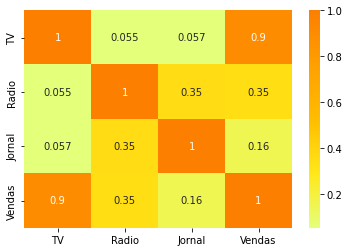

In [7]:
# Criar o gráfico
sns.heatmap(tabela.corr(), cmap='Wistia', annot=True)
# Exibe o gráfico
plt.show()

In [19]:
x = tabela.drop("Vendas", axis=1)
y = tabela["Vendas"]

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

In [20]:
# Criar o modelo de IA 
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# Treinar o modelo de IA
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

In [21]:
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

# comparar os modelos
print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao))  

0.9071151423684272
0.9622510542957408


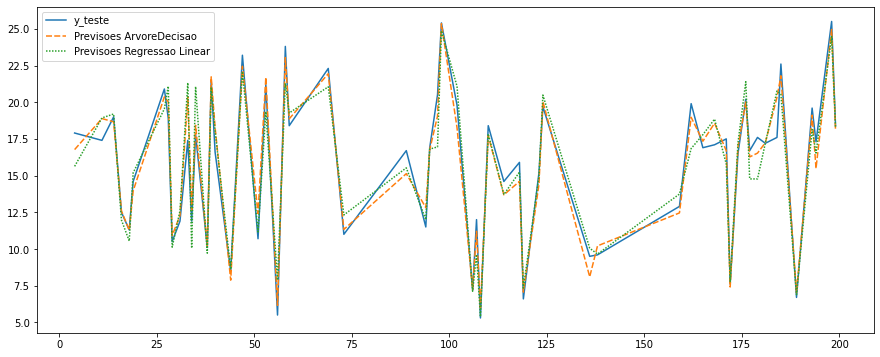

In [22]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsoes ArvoreDecisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressaolinear

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

In [26]:
nova_tabela = pd.read_csv("/content/drive/MyDrive/intensivao_python/aula4/novos.csv")
previsao = modelo_arvoredecisao.predict(nova_tabela)
display(previsao)

array([ 7.678,  8.729, 19.915])

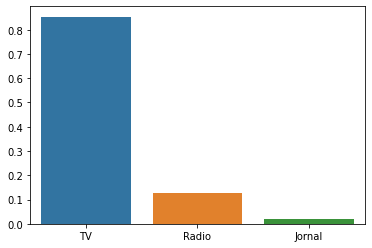

In [29]:
# Relevância de cada variável para as vendas
sns.barplot(x=x_treino.columns, y=modelo_arvoredecisao.feature_importances_)
plt.show()